<div class="alert alert-info alertinfo" style="margin-top: 0px">
<h1>  Regression </h1>
</div>

<h1> Models in this notebook </h1>
<h3> * Simple Linear Regression </h3> 
<h3> * Multiple Linear Regression </h3> 
<h3> * Polynomial Regression </h3> 
<h3> * Support Vector Regression (SVR) </h3> 
<h3> * Decision Tree Regression </h3> 
<h3> * Random Forest Regression </h3> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline 

In [2]:
# From directory
df=pd.read_csv(r'C:\Users\giuse\Desktop\Github\MYdf.csv')
# dropping columns
df = df.drop('Unnamed: 0',axis=1)
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,city-L/100km,diesel,gas,price
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,27,11.190476,0,1,13495.0
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,27,11.190476,0,1,16500.0
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,26,12.368421,0,1,16500.0
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,30,9.791667,0,1,13950.0
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,22,13.055556,0,1,17450.0


<div class="alert-success" style="margin-top: 0px">
<h1> Simple Linear Regression </h1>
</div>

Intercept:[-9.17272203e-17]
Coefficient[[0.88102675]]
Training accuracy r^2:  0.7762081362541865
Testing accuracy r^2:  0.6821862727918035
68.22% of tested data is explained by the model


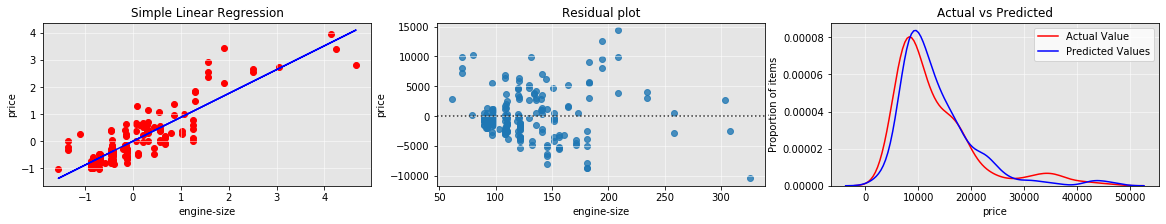

In [3]:
# Data
feature='engine-size'
target='price'
X = df[[feature]] 
y = df[[target]] 

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
 
# Scaling  
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

# Model
from sklearn.linear_model import LinearRegression
m = LinearRegression()
m.fit(X_train, y_train)
yhat=m.predict(X_train)  
print("Intercept:"+str(m.intercept_))
print("Coefficient"+str(m.coef_))

# Visualisation
fig, ax = plt.subplots(1, 3, figsize=(20, 3))
 
ax[0].scatter(X_train, y_train, color = 'red')
ax[0].plot(X_train, m.predict(X_train), color = 'blue')
ax[0].set_title('Simple Linear Regression')
ax[0].set_xlabel(feature)
ax[0].set_ylabel(target)
ax[0].set_facecolor((0.898, 0.898, 0.898))
ax[0].grid(which='major', linestyle='-', linewidth='0.5', color='white')

sns.residplot(df[feature], df['price'], ax=ax[1])
ax[1].set_title('Residual plot')
ax[1].set_xlabel(feature)
ax[1].set_ylabel(target)
ax[1].set_facecolor((0.898, 0.898, 0.898))
ax[1].grid(which='major', linestyle='-', linewidth='0.5', color='white')

sns.distplot(df[target], hist=False, color="r", label="Actual Value", ax=ax[2])
sns.distplot(sc_y.inverse_transform(m.predict(X_train)), hist=False, color="b", label="Predicted Values" , ax=ax[2])
ax[2].set_title('Actual vs Predicted')
ax[2].set_xlabel(target)
ax[2].set_ylabel('Proportion of items')
ax[2].set_facecolor((0.898, 0.898, 0.898))
ax[2].grid(which='major', linestyle='-', linewidth='0.5', color='white')

# Model accuracy (score)
from sklearn.metrics import r2_score
r1=m.score(X_train,y_train)
r2=m.score(X_test,y_test)
print('Training accuracy r^2: ', r1)
print('Testing accuracy r^2: ', r2)
rp=round(r2, 4)*100
print('{:,.2f}% of tested data is explained by the model'.format(rp))

In [4]:
# Model accuracy (r2_score)
from sklearn.metrics import r2_score
r3=r2_score(sc_y.inverse_transform(y_train), sc_y.inverse_transform(m.predict(X_train)))
r4=r2_score(sc_y.inverse_transform(y_test), sc_y.inverse_transform(m.predict(X_test)))
print('Training accuracy r^2: ', r3)
print('Testing accuracy r^2: ', r4)

rp=round(r4, 4)*100
print('{:,.2f}% of tested data is explained by the model'.format(rp))

Training accuracy r^2:  0.7762081362541864
Testing accuracy r^2:  0.6821862727918035
68.22% of tested data is explained by the model


<div class="alert-success" style="margin-top: 0px">
<h1> Multiple Linear Regression </h1>
</div>

Intercept:[1.32721991e-16]
Coefficient[[0.74583786 0.02583259 0.16286952]]


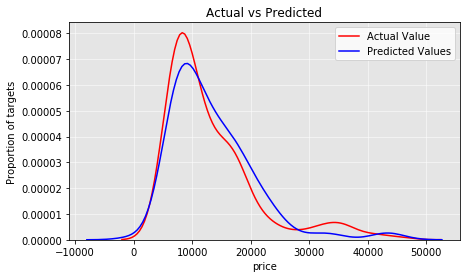

Training accuracy r^2:  0.7922685302275099
Testing accuracy r^2:  0.7591331248616584
75.91% of tested data is explained by the model


In [5]:
# Data
f1='engine-size'
f2='length'
f3='width'
target='price'

X = df[[f1,f2,f3]] 
y = df[[target]] 

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
 
# Scaling  
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

# Model
from sklearn.linear_model import LinearRegression
m = LinearRegression()
m.fit(X_train, y_train)
yhat=m.predict(X_train)  

print("Intercept:"+str(m.intercept_))
print("Coefficient"+str(m.coef_))

# Visualisation
plt.figure(figsize=(7, 4))
ax1 = sns.distplot(df[target], hist=False, color="r", label="Actual Value")
ax1.set_facecolor((0.898, 0.898, 0.898))
sns.distplot(sc_y.inverse_transform(m.predict(X_train)), hist=False, color="b", label="Predicted Values" , ax=ax1)
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='white') 
plt.title('Actual vs Predicted')
plt.xlabel(target)
plt.ylabel('Proportion of targets')

plt.show()
plt.close()

# Model accuracy
from sklearn.metrics import r2_score
r1=m.score(X_train,y_train)
r2=m.score(X_test,y_test)
print('Training accuracy r^2: ', r1)
print('Testing accuracy r^2: ', r2)
rp=round(r2, 4)*100
print('{:,.2f}% of tested data is explained by the model'.format(rp))

<div class="alert-success" style="margin-top: 0px">
<h1> Polynomial Regression </h1>
</div>

           3         2
-0.006641 x + 3.645 x - 433.4 x + 2.208e+04


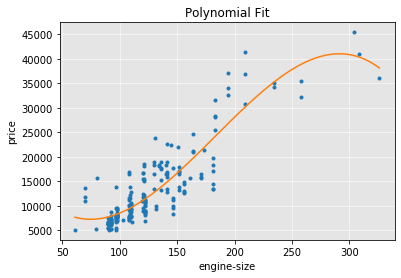

Accuracy r^2:  0.790151993157433
79.02% of trained data is explained by the model


In [6]:
# Data
feature='engine-size'
target='price'
order = 3

X = df[[feature]]
y = df[target] 

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
 
# Scaling  
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model
f = np.polyfit(df[feature], y, order)
p = np.poly1d(f)
print(p) 

# Visualisation
def PlotPolly(model, independent_variable, dependent_variable):
    x_new = np.linspace(df[feature].min(), df[feature].max(), 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(feature)
    plt.ylabel(target)       
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='white')        
    plt.show()
    plt.close()

PlotPolly(p, X, y) 

# Model accuracy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r1 = r2_score(y, p(X))
print('Accuracy r^2: ', r1)

rp=round(r1, 4)*100
print('{:,.2f}% of trained data is explained by the model'.format(rp))

<div class="alert-success" style="margin-top: 0px">
<h1> Support Vector Regression (SVR) </h1>
</div>

C:\Users\giuse\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


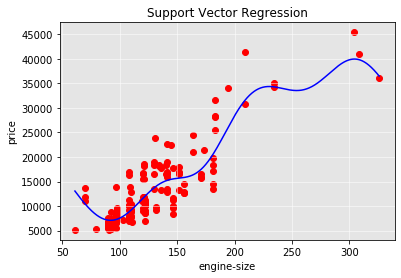

Training accuracy r^2:  -2.030058684206117
Testing accuracy r^2:  0.8460859620945339
84.61% of tested data is explained by the model


In [7]:
# Data
feature='engine-size'
target='price'
X = df[[feature]]
y = df[[target]]

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

# Model
from sklearn.svm import SVR
m = SVR(kernel = 'rbf')
m.fit(X_train, y_train)
yhat=sc_y.inverse_transform(m.predict(sc_X.transform(X_test)))

# Visualisation
X_grid = np.arange(min(sc_X.inverse_transform(X_train)), max(sc_X.inverse_transform(X_train)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
fig = plt.figure()
ax1 = fig.gca()
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='white')
ax1.scatter(sc_X.inverse_transform(X_train), sc_y.inverse_transform(y_train), color = 'red')
ax1.plot(X_grid, sc_y.inverse_transform(m.predict(sc_X.transform(X_grid))), color = 'blue')
ax1.set_title('Support Vector Regression')
ax1.set_xlabel(feature)
ax1.set_ylabel(target)
ax1.set_facecolor((0.898, 0.898, 0.898))
plt.show()

# Model accuracy
from sklearn.metrics import r2_score
r1=r2_score(sc_y.inverse_transform(y_train), sc_y.inverse_transform(m.predict(sc_X.transform(X_train))))
r2=r2_score(y_test, sc_y.inverse_transform(m.predict(sc_X.transform(X_test))))
print('Training accuracy r^2: ', r1)
print('Testing accuracy r^2: ', r2)

rp=round(r2, 4)*100
print('{:,.2f}% of tested data is explained by the model'.format(rp))

<div class="alert-success" style="margin-top: 0px">
<h1> Decision Tree Regression </h1>
</div>

Training accuracy r^2:  0.9349874262381855
Testing accuracy r^2:  0.90141225725189
90.14% of tested data is explained by the model


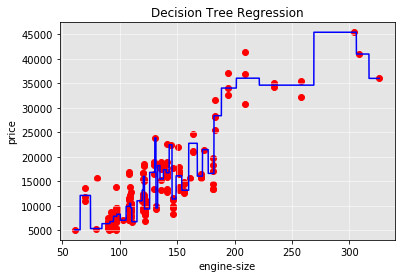

In [10]:
# Data
feature='engine-size'
target='price'
X = df[[feature]].values
y = df[[target]]

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
 
# Scaling  is not applicable to decision trees

# Model
from sklearn.tree import DecisionTreeRegressor
m = DecisionTreeRegressor(random_state = 0)
m.fit(X_train, y_train)
yhat = m.predict(X_test)

# Visualisation
fig = plt.figure()
ax = fig.gca()
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
ax.set_facecolor((0.898, 0.898, 0.898))
ax.grid(which='major', linestyle='-', linewidth='0.5', color='white')
ax.scatter(X, y, color = 'red')
ax.plot(X_grid, m.predict(X_grid), color = 'blue')
ax.set_title('Decision Tree Regression')
ax.set_xlabel(feature)
ax.set_ylabel(target)
fig

# Model accuracy
from sklearn.metrics import r2_score

r1=r2_score(y_train,m.predict(X_train))
r2=r2_score(y_test,m.predict(X_test))
print('Training accuracy r^2: ', r1)
print('Testing accuracy r^2: ', r2)

rp=round(r2, 4)*100
print('{:,.2f}% of tested data is explained by the model'.format(rp))

<div class="alert-success" style="margin-top: 0px">
<h1> Random Forest Regression </h1>
</div>

Training accuracy r^2:  0.9262332108665967
Testing accuracy r^2:  0.9617545374054769
96.18% of tested data is explained by the model


C:\Users\giuse\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


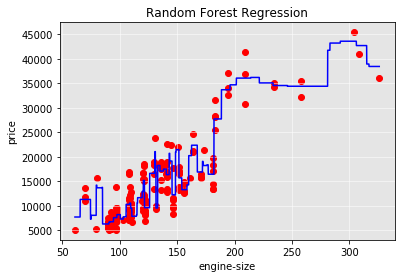

In [11]:
# Data
feature='engine-size'
target='price'
X = df[[feature]].values
y = df[[target]]

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
 
# Scaling  is not applicable to decision trees

# Model
from sklearn.ensemble import RandomForestRegressor
m= RandomForestRegressor(n_estimators = 10, random_state = 0)
m.fit(X, y)

# Visualisation
# Visualisation
fig = plt.figure()
ax = fig.gca()
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
ax.set_facecolor((0.898, 0.898, 0.898))
ax.grid(which='major', linestyle='-', linewidth='0.5', color='white')
ax.scatter(X, y, color = 'red')
ax.plot(X_grid, m.predict(X_grid), color = 'blue')
ax.set_title('Random Forest Regression')
ax.set_xlabel(feature)
ax.set_ylabel(target)
fig

# Model accuracy
from sklearn.metrics import r2_score

r1=r2_score(y_train,m.predict(X_train))
r2=r2_score(y_test,m.predict(X_test))
print('Training accuracy r^2: ', r1)
print('Testing accuracy r^2: ', r2)

rp=round(r2, 4)*100
print('{:,.2f}% of tested data is explained by the model'.format(rp))